# How in demand skills are trending for Data Analysts??

In [1]:
# importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
#df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Richa Tripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_da_india=df[(df['job_country']=='India')&(df['job_title']=='Data Analyst')].copy()

In [7]:
df_da_india['job_posted_month_no']=df_da_india['job_posted_date'].dt.month

In [10]:
df_da_india_explode=df_da_india.explode('job_skills')


In [19]:
df_da_india_pivot=df_da_india_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_da_india_pivot.loc['total']=df_da_india_pivot.sum()
df_da_india_pivot
df_da_india_pivot=df_da_india_pivot[df_da_india_pivot.loc['total'].sort_values(ascending=False).index]
df_da_india_pivot=df_da_india_pivot.drop('total')
df_da_india_pivot

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,sqlite,suse,swift,tidyr,unify,vb.net,watson,webex,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,75,55,51,41,26,36,23,6,5,11,...,0,0,0,0,0,0,0,0,1,0
2,64,40,46,32,24,14,23,6,7,8,...,0,0,0,0,0,0,0,1,0,0
3,57,25,32,30,19,10,9,7,6,3,...,0,0,1,1,0,0,0,0,0,0
4,56,35,35,27,23,24,16,4,8,7,...,1,0,0,0,0,0,0,0,0,0
5,44,25,37,24,18,10,9,4,9,3,...,0,0,0,0,0,0,0,0,0,0
6,50,42,34,29,23,28,23,10,9,5,...,0,0,0,0,0,0,0,0,0,0
7,57,37,37,38,20,20,23,5,8,5,...,0,0,0,0,1,0,0,0,0,0
8,88,58,54,47,43,24,28,20,11,7,...,0,0,0,0,0,0,0,0,0,0
9,96,65,59,53,43,26,27,12,5,14,...,0,0,0,0,0,1,0,0,0,0


In [24]:
da_total=df_da_india.groupby('job_posted_month_no').size()



In [27]:
df_da_india_percent=df_da_india_pivot.div(da_total/100,axis=0)

In [49]:
# now we want to change month number into month name
from time import strftime


df_da_india_percent=df_da_india_percent.reset_index(drop=True)
df_da_india_percent['job_posted_month']=df_da_india_percent['job_posted_month_no'].apply(lambda x:pd.to_datetime(x, format='%m').strftime('%b'))
df_da_india_percent = df_da_india_percent.set_index('job_posted_month')
df_da_india_percent=df_da_india_percent.drop(columns='job_posted_month_no')



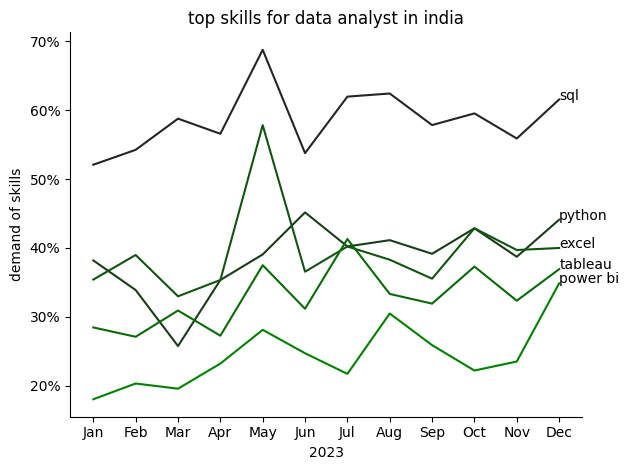

In [80]:
df_plot=df_da_india_percent.iloc[:,:5]
sns.lineplot(data=df_plot,dashes=False,legend=False,palette='dark:g')
sns.despine()
plt.title('top skills for data analyst in india')
plt.xlabel('2023')
plt.ylabel('demand of skills')

# to chnage the formate of y axis in percentage 
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())


for i in range(5):                 ## to show the skill name to each line 
    plt.text(11,df_plot.iloc[-1,i],df_plot.columns[i])
plt.tight_layout()